In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('owid-covid-data.csv')
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,05-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,06-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,07-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,08-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,09-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [7]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
df.dropna(subset=['location'], inplace=True)


In [8]:
df_main = df[['location', 'date', 'total_cases', 'total_deaths',
              'total_vaccinations', 'people_vaccinated',
              'people_fully_vaccinated', 'population',
              'gdp_per_capita', 'hospital_beds_per_thousand']]


<Axes: xlabel='total_cases', ylabel='location'>

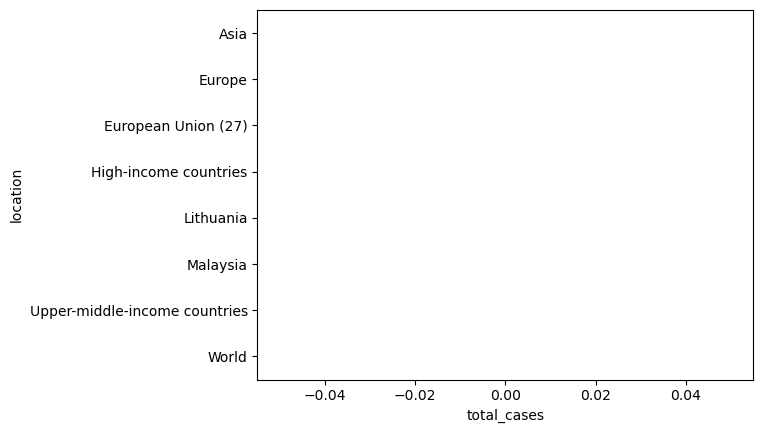

In [9]:
latest = df[df['date'] == df['date'].max()]
top_cases = latest.sort_values('total_cases', ascending=False).head(10)
sns.barplot(data=top_cases, x='total_cases', y='location')


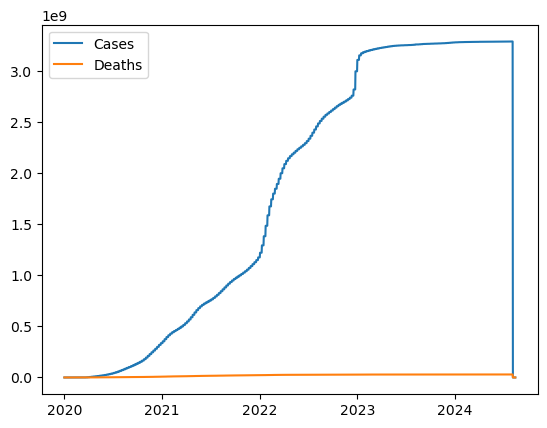

In [10]:
global_df = df.groupby('date')[['total_cases', 'total_deaths']].sum().reset_index()
plt.plot(global_df['date'], global_df['total_cases'], label='Cases')
plt.plot(global_df['date'], global_df['total_deaths'], label='Deaths')
plt.legend()


<Axes: xlabel='people_vaccinated', ylabel='location'>

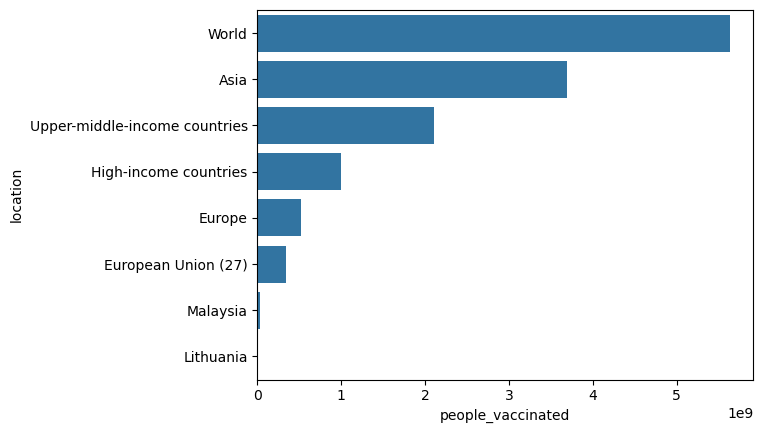

In [11]:
top_vax = latest.sort_values('people_vaccinated', ascending=False).head(10)
sns.barplot(x='people_vaccinated', y='location', data=top_vax)


C:\anaconda3\envs\covid_env\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\anaconda3\envs\covid_env\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

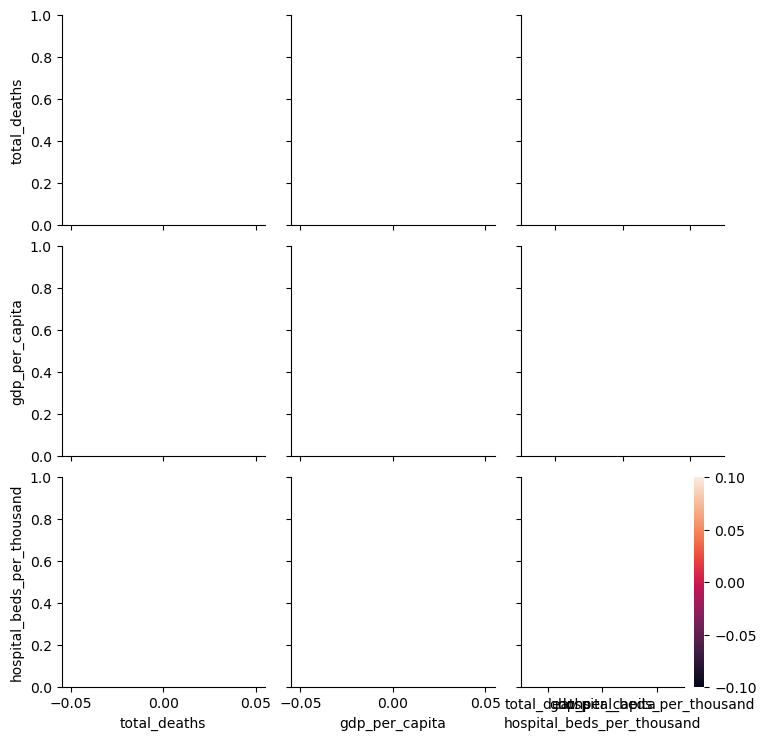

In [12]:
corr_data = latest[['total_deaths', 'gdp_per_capita', 'hospital_beds_per_thousand']].dropna()
sns.pairplot(corr_data)
sns.heatmap(corr_data.corr(), annot=True)


In [13]:
import folium
from folium.plugins import HeatMap

world_map = folium.Map(location=[20, 0], zoom_start=2)

heat_data = [[row['latitude'], row['longitude'], row['total_cases']] for index, row in latest.iterrows() if not pd.isna(row['total_cases'])]

HeatMap(heat_data).add_to(world_map)
world_map